<a href="https://colab.research.google.com/github/andreibonifacio/API-youtube/blob/main/API_Youtube_atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
!pip install --upgrade google-api-python-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.1.1
    Uninstalling google-auth-httplib2-0.1.1:
      Successfully uninstalled google-auth-httplib2-0.1.1
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.84.0
    Uninstalling google-api-python-client-2.84.0:
      Successfully uninstalled google-api-python-client-2.84.0


In [ ]:
from googleapiclient.discovery import build
youTubeApiKey="---------------------"
youtube = build('youtube','v3', developerKey=youTubeApiKey)

In [ ]:
#Bibliotecas:
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import numpy as np
from sklearn.linear_model import LinearRegression

#Atributos quantitativos de statistics:
estatisticas_quantitativas = ('viewCount','likeCount','dislikeCount','commentCount','favoriteCount','subscriberCount')

#Esta função estabelece uma relação em regressão linear entre duas statistics quantitativas quaisquer de todos os vídeos de uma playlist e plota o gráfico:
def regressao_atributos(playlist_id, estatistica_1, estatistica_2):
  #Listas vazias para armazenar os valores de cada estatística:
    contagem_estatistica_1 = []
    contagem_estatistica_2 = []
    #Definindo a variável playlist_videos, que conterá os vídeos da playlist identificada pela variável playlist_id:
    playlist_videos = youtube.playlistItems().list(part='snippet',playlistId=playlist_id,maxResults=50).execute()
    #Iterando sobre cada vídeo da playlist escolhida como argumento e obtendo as statistics de todos eles:
    for item in playlist_videos['items']:
        video_id = item['snippet']['resourceId']['videoId']
        video_statistics = youtube.videos().list(part='statistics',id=video_id).execute()
        #Adicionando as statistics escolhidas como argumentos à contagem, que estava vazia até agora:
        for estatistica in (estatistica_1, estatistica_2):
            if 'statistics' in video_statistics['items'][0] and estatistica in video_statistics['items'][0]['statistics']:
                if estatistica == estatistica_1:
                   contagem_estatistica_1.append(int(video_statistics['items'][0]['statistics'][estatistica]))
                elif estatistica == estatistica_2:
                   contagem_estatistica_2.append(int(video_statistics['items'][0]['statistics'][estatistica]))
    #Estabelecendo a regressão:
    estatistica_1_array = np.array(contagem_estatistica_1).reshape(-1,1)
    estatistica_2_array = np.array(contagem_estatistica_2).reshape(-1,1)
    regressao = LinearRegression()
    regressao.fit(estatistica_1_array, estatistica_2_array)
    #Plotando o gráfico:
    plt.scatter(contagem_estatistica_1, contagem_estatistica_2, color='blue')
    plt.plot(estatistica_1_array, regressao.predict(estatistica_1_array), color='red')
    plt.title('Regressão Linear')
    plt.xlabel(estatistica_1)
    plt.ylabel(estatistica_2)
    plt.show()

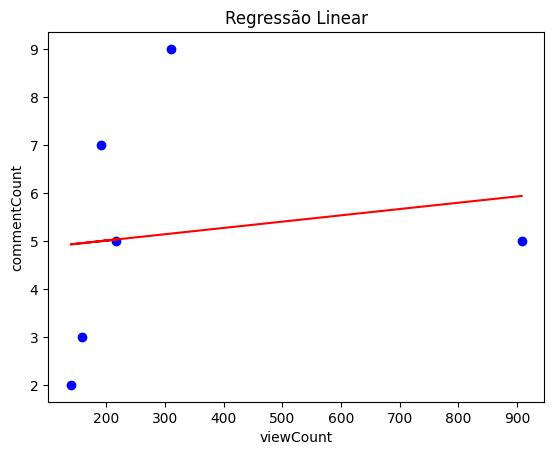

In [ ]:
#Exemplo: comparando visualizações e contagem de comentários dos vídeos do curso de SQL do canal do FEA.Dev.
regressao_atributos('PLiJqHBsOKi2f6ibhVJFmfK2x7YYwoNXy-','viewCount','commentCount')

In [ ]:
#Problema na mesma playlist:
regressao_atributos('PLiJqHBsOKi2f6ibhVJFmfK2x7YYwoNXy-','viewCount','likeCount')

ValueError: Found input variables with inconsistent numbers of samples: [6, 5]

In [ ]:
# Gráfico de barras mostrando o valor das estatísticas para cada vídeo da playlist (ex. - visualizações):
def grafico_barras_visualizacoes(playlist_id):
    #Lista vazia para armazenar os valores da estatística:
    estatistica_escolhida = []
    #Definindo a variável playlist_videos, que conterá os vídeos da playlist identificada pela variável playlist_id:
    playlist_videos = youtube.playlistItems().list(part='snippet',playlistId=playlist_id,maxResults=50).execute()
    #Iterando sobre cada vídeo da playlist escolhida como argumento e obtendo as statistics de todos eles:
    for item in playlist_videos['items']:
        video_id = item['snippet']['resourceId']['videoId']
        video_statistics = youtube.videos().list(part='statistics',id=video_id).execute()
        statistic_count = int(video_statistics['items'][0]['statistics']['viewCount'])
        estatistica_escolhida.append(statistic_count)
    #Plotando o gráfico:
    labels = [f"Vídeo {i+1}" for i in range(len(estatistica_escolhida))]
    values = estatistica_escolhida
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Vídeo')
    plt.ylabel('Estatísticas')
    plt.title('Gráfico de barras')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

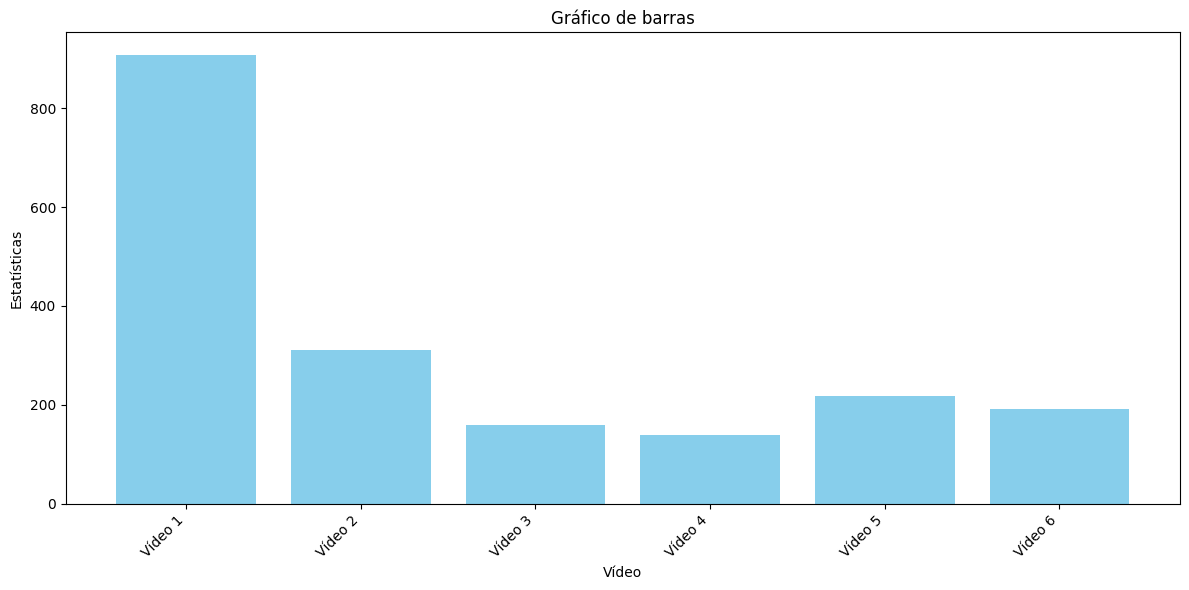

In [ ]:
#Exemplo: comparando visualizações e contagem de comentários dos vídeos do curso de SQL do canal do FEA.Dev.
grafico_barras_visualizacoes('PLiJqHBsOKi2f6ibhVJFmfK2x7YYwoNXy-')

In [ ]:
#Outras formas de análise de dados?